**Author:** C Mitchell

This notebook is to visualize the uncertainty in the PIC protocol via the N culture results.

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing datasets

## Blank corrected

In [7]:
df = pd.read_csv('data/03-PIC-blank-corrected.csv')
df = df.assign(label= df.Code.str[:-1])

## Blank values and non-blank corrected data

Note: for the blanks we want to use all the individual blank measurements, not the mean for each treatment, so we need to go back to an earlier version of the dataset for the blanks as well as the uncorrected data

In [8]:
blankdf = pd.read_csv('data/02-ICPMS-and-PIC.csv')

In [9]:
blank_df = blankdf[blankdf.Code.str.startswith('M')]

In [10]:
nonblank_df = blankdf[blankdf.Code.str.startswith('N')]

# Plotting

First let's pull out all the relevant data columns

In [11]:
# blanks
blank2 =  blank_df['PIC mmol/m3']
blank = blank_df['PIC ug/l']

# uncorrected
upic2 =  nonblank_df['PIC mmol/m3']
upic = nonblank_df['PIC ug/l']

# corrected (with outliers removed)
Ndf = df[df.Code.str.startswith('N')]
bx_outliers = [8, 9, 56]
pic = Ndf['PIC ug/l']
pic_bx = pic[~pic.index.isin(bx_outliers)]
pic2 = Ndf['PIC mmol/m3']
pic2_bx = pic2[~pic2.index.isin(bx_outliers)]

Finally, doing the plotting

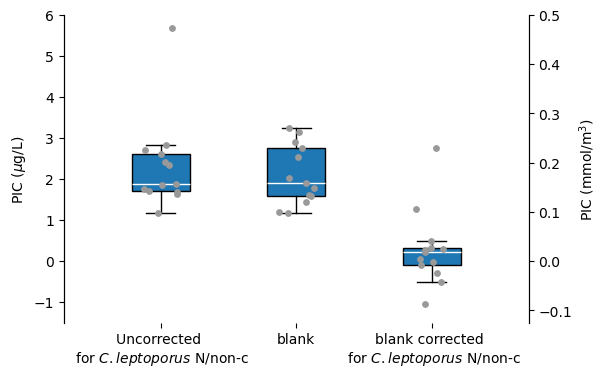

In [12]:
fig, ax = plt.subplots(figsize = (6,4))

## Uncorrected pic
ax.boxplot([upic, blank, pic], positions = [0.8,1.5,2.2], showfliers=False, widths = 0.3,patch_artist=True, 
           medianprops={"color": "white", "linewidth": 1})

# add the data points so y-axes match
ax.scatter(np.ones_like(upic), upic, alpha=0)
ax.set_ylabel(r'PIC ($\mu$g/L)');
ax.set_ylim([-1.5,6])

# make second axis
ax2 = ax.twinx()

### dots for 1st boxplot
# make jitter for the data points
x = np.ones_like(upic2)*0.8
jitter_strength = 0.1
x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)

# Overlay all data points
ax2.scatter(x_jittered, upic2, s=15,color=[0.6,0.6,0.6])
ax2.set_ylabel(r'PIC (mmol/m$^3$)');
ax2.set_ylim([-1.5/12,6/12])

### dots for second boxplot
x = np.ones_like(blank2)*1.5
jitter_strength = 0.1
x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)

# Overlay all data points
ax2.scatter(x_jittered, blank2, s=15,color=[0.6,0.6,0.6])
ax2.set_ylabel(r'PIC (mmol/m$^3$)');
ax2.set_ylim([-1.5/12,6/12])

### dots for third boxplot
# make jitter for the data points
x = np.ones_like(pic2)*2.2
jitter_strength = 0.1
x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)

# Overlay all data points
ax2.scatter(x_jittered, pic2, s=15,color=[0.6,0.6,0.6])
ax2.set_ylabel(r'PIC (mmol/m$^3$)');
ax2.set_ylim([-1.5/12,6/12])

#ax2.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.set_xticks([]);
ax.set_xticks([0.8,1.5,2.2]);
ax.set_xticklabels(['Uncorrected \n for $\\mathit{C. leptoporus}$ N/non-c',
                    'blank',
                    'blank corrected \n for $\\mathit{C. leptoporus}$ N/non-c']);

plt.savefig('figures/Fig3-uncertainty-boxplots.png', dpi = 350, bbox_inches='tight')